In [ ]:
!pip install researchpy
!pip install pyreadstat
!pip install pingouin
!git clone https://github.com/Rasstin/Experimental_Methods.git


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import numpy as np
import statsmodels as sm
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
import pingouin as pg
import scipy as sp

# Reading & Data Cleaning & EDA

In [ ]:
df = pd.read_csv('Experimental_Methods/Study 3 Phone vs. PC.csv')

In [ ]:
# df.info()

In [ ]:
df.columns

Index(['Device', 'ComfortIndex1', 'ComfortIndex2', 'ComfortIndex3', 'Subj_ID',
       'relax1', 'calm1', 'ease1', 'anxious1', 'confident1', 'satisf1',
       'bored1', 'happy1', 'focus1', 'comfort1', 'excited1', 'sad1', 'frustr1',
       'relax2', 'calm2', 'ease2', 'anxious2', 'confident2', 'satisf2',
       'bored2', 'happy2', 'focus2', 'comfort2', 'excited2', 'sad2', 'frustr2',
       'diffRat', 'diffAnag', 'diffMath', 'moreTime', 'relax3', 'calm3',
       'ease3', 'anxious3', 'confident3', 'satisf3', 'bored3', 'happy3',
       'focus3', 'comfort3', 'excited3', 'sad3', 'frustr3', 'emo1', 'emo2',
       'emo3', 'emo4', 'emo5', 'emo6', 'emo7', 'emo8', 'emo9', 'emo10',
       'similar', 'age', 'male', 'study', 'grew_up', 'ethnic', 'English',
       'Hours', 'REVemo4', 'REVemo6', 'Attach_index'],
      dtype='object')

In [ ]:
set(df[df.Device == 'mobile'].Subj_ID).intersection(set(df[df.Device == 'PC'].Subj_ID))



{'217'}

In [ ]:
df[df.Subj_ID == '217']

,Device,ComfortIndex1,ComfortIndex2,ComfortIndex3,Subj_ID,relax1,calm1,ease1,anxious1,confident1,...,age,male,study,grew_up,ethnic,English,Hours,REVemo4,REVemo6,Attach_index
17,mobile,7.0,5.0,5.6,217,7,7,7,1,7,...,20,0,bio,USA,Asian,1,2.0,2,3,1.7
39,PC,4.6,3.6,4.6,217,6,5,3,3,5,...,32,0,urban planning,Iran,Other,0,3.5,5,3,3.9


In [ ]:
df.loc[39,'Subj_ID'] = '217b'

In [ ]:
set(df[df.Device == 'mobile'].Subj_ID).intersection(set(df[df.Device == 'PC'].Subj_ID))



set()

In [ ]:
df[df.Subj_ID == '217']

,Device,ComfortIndex1,ComfortIndex2,ComfortIndex3,Subj_ID,relax1,calm1,ease1,anxious1,confident1,...,age,male,study,grew_up,ethnic,English,Hours,REVemo4,REVemo6,Attach_index
17,mobile,7.0,5.0,5.6,217,7,7,7,1,7,...,20,0,bio,USA,Asian,1,2.0,2,3,1.7


In [ ]:
# df = df[df.Subj_ID != '217']

In [ ]:
df['FMC1'] = df[['relax1', 'calm1', 'ease1', 'anxious1','comfort1']].mean(axis=1)
df['FMC2'] = df[['relax2', 'calm2', 'ease2', 'anxious2','comfort2']].mean(axis=1)
df['FMC3'] = df[['relax3', 'calm3', 'ease3', 'anxious3','comfort3']].mean(axis=1)

In [ ]:
df.drop(columns=['relax1', 'calm1', 'ease1', 'anxious1','comfort1',
                 'relax2', 'calm2', 'ease2', 'anxious2','comfort2',
                'relax3', 'calm3', 'ease3', 'anxious3','comfort3'] , inplace=True)

In [ ]:
df.drop(columns=['confident1', 'satisf1', 'bored1', 'happy1', 'focus1', 'excited1',
       'sad1', 'frustr1', 'confident2', 'satisf2', 'bored2', 'happy2',
       'focus2', 'excited2', 'sad2', 'frustr2','confident3', 'satisf3', 'bored3', 'happy3',
       'focus3', 'excited3', 'sad3', 'frustr3', 'emo1', 'emo2', 'emo3', 'emo4',
       'emo5', 'emo6', 'emo7', 'emo8', 'emo9', 'emo10'], inplace=True)

In [ ]:
df[['diffRat', 'diffAnag', 'diffMath']]

,diffRat,diffAnag,diffMath
0,4,6,6
1,5,6,2
2,7,7,5
3,2,6,1
4,5,6,4
5,4,7,6
6,5,6,6
7,5,5,5
8,6,6,6
9,6,6,7


In [ ]:
df.columns

Index(['Device', 'ComfortIndex1', 'ComfortIndex2', 'ComfortIndex3', 'Subj_ID',
       'diffRat', 'diffAnag', 'diffMath', 'moreTime', 'similar', 'age', 'male',
       'study', 'grew_up', 'ethnic', 'English', 'Hours', 'REVemo4', 'REVemo6',
       'Attach_index', 'FMC1', 'FMC2', 'FMC3'],
      dtype='object')

In [ ]:
df.ComfortIndex3 - df.FMC3

0     1.2
1     0.4
2     0.8
3     0.8
4     0.0
5     0.4
6     0.4
7     0.8
8     0.4
9     1.2
10    0.0
11    0.4
12    0.8
13    0.8
14    0.4
15    0.8
16    0.8
17    0.4
18    0.8
19   -0.4
20    1.2
21    0.8
22    0.8
23    0.4
24    0.8
25    0.4
26    0.4
27    0.0
28    0.4
29    0.4
30    1.2
31    1.2
32    0.4
33    0.4
34    1.2
35    0.0
36    1.2
37    1.2
38    0.4
39    0.8
40    1.2
41    0.8
42   -0.8
43    0.4
44    1.2
45    0.8
46    0.8
47    0.0
48    0.0
49    0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Device         50 non-null     object 
 1   ComfortIndex1  50 non-null     float64
 2   ComfortIndex2  50 non-null     float64
 3   ComfortIndex3  50 non-null     float64
 4   Subj_ID        50 non-null     object 
 5   diffRat        50 non-null     int64  
 6   diffAnag       50 non-null     int64  
 7   diffMath       50 non-null     int64  
 8   moreTime       50 non-null     int64  
 9   similar        50 non-null     int64  
 10  age            50 non-null     int64  
 11  male           50 non-null     int64  
 12  study          49 non-null     object 
 13  grew_up        50 non-null     object 
 14  ethnic         50 non-null     object 
 15  English        50 non-null     int64  
 16  Hours          50 non-null     float64
 17  REVemo4        50 non-null     int64  
 18  REVemo6     

In [ ]:
# df.Subj_ID = df.Subj_ID.astype(int)
# df.age = df.age.astype(int)

In [ ]:
df.Subj_ID

0       53
1       54
2       55
3       57
4       58
5       64
6       69
7       85
8      201
9      204
10     205
11     206
12     207
13     212
14     216
15     219
16     220
17     217
18      19
19      22
20     229
21     232
22     300
23     304
24      51
25      52
26      60
27      61
28     61b
29      62
30      70
31      77
32     202
33     203
34     208
35     209
36     210
37     211
38     214
39    217b
40     218
41      18
42      23
43     230
44     301
45     303
46     305
47     306
48     307
49     302
Name: Subj_ID, dtype: object

In [ ]:
df.shape

(50, 23)

In [ ]:
df.head()

,Device,ComfortIndex1,ComfortIndex2,ComfortIndex3,Subj_ID,diffRat,diffAnag,diffMath,moreTime,similar,...,grew_up,ethnic,English,Hours,REVemo4,REVemo6,Attach_index,FMC1,FMC2,FMC3
0,mobile,3.2,2.4,5.4,53,4,6,6,3,0,...,USA,Hispanic,1,4.5,5,5,5.0,3.2,2.8,4.2
1,mobile,5.0,3.8,5.0,54,5,6,2,4,0,...,USA,Asian,1,1.0,4,3,3.7,4.6,3.4,4.6
2,mobile,5.0,1.2,6.0,55,7,7,5,5,1,...,China,Asian,0,1.0,2,2,2.5,5.0,2.0,5.2
3,mobile,4.0,3.6,5.0,57,2,6,1,5,0,...,Turkey,White,0,4.0,5,3,3.3,4.0,3.2,4.2
4,mobile,3.2,2.8,4.2,58,5,6,4,4,0,...,USA,White,1,4.5,5,5,4.4,3.6,3.2,4.2


In [ ]:
# df.Subject.value_counts()

In [ ]:
df.head()

,Device,ComfortIndex1,ComfortIndex2,ComfortIndex3,Subj_ID,diffRat,diffAnag,diffMath,moreTime,similar,...,grew_up,ethnic,English,Hours,REVemo4,REVemo6,Attach_index,FMC1,FMC2,FMC3
0,mobile,3.2,2.4,5.4,53,4,6,6,3,0,...,USA,Hispanic,1,4.5,5,5,5.0,3.2,2.8,4.2
1,mobile,5.0,3.8,5.0,54,5,6,2,4,0,...,USA,Asian,1,1.0,4,3,3.7,4.6,3.4,4.6
2,mobile,5.0,1.2,6.0,55,7,7,5,5,1,...,China,Asian,0,1.0,2,2,2.5,5.0,2.0,5.2
3,mobile,4.0,3.6,5.0,57,2,6,1,5,0,...,Turkey,White,0,4.0,5,3,3.3,4.0,3.2,4.2
4,mobile,3.2,2.8,4.2,58,5,6,4,4,0,...,USA,White,1,4.5,5,5,4.4,3.6,3.2,4.2


In [ ]:
df.shape

(50, 23)

In [ ]:
df.nunique()

Device            2
ComfortIndex1    20
ComfortIndex2    21
ComfortIndex3    15
Subj_ID          50
diffRat           7
diffAnag          5
diffMath          7
moreTime          4
similar           2
age              13
male              2
study            31
grew_up          10
ethnic            5
English           2
Hours             8
REVemo4           5
REVemo6           5
Attach_index     26
FMC1             17
FMC2             18
FMC3             16
dtype: int64

In [ ]:
# df.order.unique()

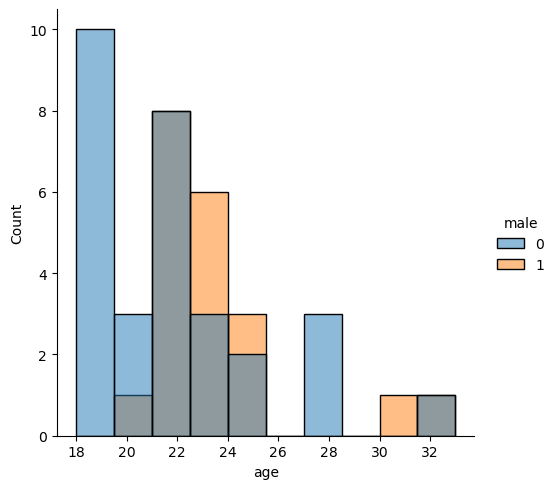

In [ ]:
sns.displot(data = df , x ='age',hue='male',)

In [ ]:
df.age.mean() , df.age.std(), df.male.value_counts(normalize=True)

(22.34,
 3.426249213567131,
 0    0.6
 1    0.4
 Name: male, dtype: float64)

In [ ]:
df.head()

,Device,ComfortIndex1,ComfortIndex2,ComfortIndex3,Subj_ID,diffRat,diffAnag,diffMath,moreTime,similar,...,grew_up,ethnic,English,Hours,REVemo4,REVemo6,Attach_index,FMC1,FMC2,FMC3
0,mobile,3.2,2.4,5.4,53,4,6,6,3,0,...,USA,Hispanic,1,4.5,5,5,5.0,3.2,2.8,4.2
1,mobile,5.0,3.8,5.0,54,5,6,2,4,0,...,USA,Asian,1,1.0,4,3,3.7,4.6,3.4,4.6
2,mobile,5.0,1.2,6.0,55,7,7,5,5,1,...,China,Asian,0,1.0,2,2,2.5,5.0,2.0,5.2
3,mobile,4.0,3.6,5.0,57,2,6,1,5,0,...,Turkey,White,0,4.0,5,3,3.3,4.0,3.2,4.2
4,mobile,3.2,2.8,4.2,58,5,6,4,4,0,...,USA,White,1,4.5,5,5,4.4,3.6,3.2,4.2


In [ ]:
df2 = df.copy()

In [ ]:
tmp = df

In [ ]:
tmp.rename(columns={"LnRT_mean.1":"round_1","LnRT_mean.2":"round_2","order":'Order'},inplace=True)

In [ ]:
tmp.head()

,Device,ComfortIndex1,ComfortIndex2,ComfortIndex3,Subj_ID,diffRat,diffAnag,diffMath,moreTime,similar,...,grew_up,ethnic,English,Hours,REVemo4,REVemo6,Attach_index,FMC1,FMC2,FMC3
0,mobile,3.2,2.4,5.4,53,4,6,6,3,0,...,USA,Hispanic,1,4.5,5,5,5.0,3.2,2.8,4.2
1,mobile,5.0,3.8,5.0,54,5,6,2,4,0,...,USA,Asian,1,1.0,4,3,3.7,4.6,3.4,4.6
2,mobile,5.0,1.2,6.0,55,7,7,5,5,1,...,China,Asian,0,1.0,2,2,2.5,5.0,2.0,5.2
3,mobile,4.0,3.6,5.0,57,2,6,1,5,0,...,Turkey,White,0,4.0,5,3,3.3,4.0,3.2,4.2
4,mobile,3.2,2.8,4.2,58,5,6,4,4,0,...,USA,White,1,4.5,5,5,4.4,3.6,3.2,4.2


In [ ]:
tmp.columns

Index(['Device', 'ComfortIndex1', 'ComfortIndex2', 'ComfortIndex3', 'Subj_ID',
       'diffRat', 'diffAnag', 'diffMath', 'moreTime', 'similar', 'age', 'male',
       'study', 'grew_up', 'ethnic', 'English', 'Hours', 'REVemo4', 'REVemo6',
       'Attach_index', 'FMC1', 'FMC2', 'FMC3'],
      dtype='object')

In [ ]:
tmp = tmp.melt(value_vars=['ComfortIndex1','ComfortIndex2','ComfortIndex3'] , var_name= 'Time' ,value_name='Comfort_Level' ,id_vars = ['Device' , 'Subj_ID'])

In [ ]:
tmp.head()

,Device,Subj_ID,Time,Comfort_Level
0,mobile,53,ComfortIndex1,3.2
1,mobile,54,ComfortIndex1,5.0
2,mobile,55,ComfortIndex1,5.0
3,mobile,57,ComfortIndex1,4.0
4,mobile,58,ComfortIndex1,3.2


In [ ]:
tmp.Time = tmp.Time.str.replace('ComfortIndex','Time')

In [ ]:
tmp.head()

,Device,Subj_ID,Time,Comfort_Level
0,mobile,53,Time1,3.2
1,mobile,54,Time1,5.0
2,mobile,55,Time1,5.0
3,mobile,57,Time1,4.0
4,mobile,58,Time1,3.2


In [ ]:
x = ["Device" , 'Time']
wx = 'Time'
bx = 'Device'
# gx = 'Block'

y = "Comfort_Level"


In [ ]:

df = tmp 

In [ ]:
df.shape

(150, 4)

In [ ]:
report = rp.summary_cont(df.groupby(x[0]),decimals=3)[y]


report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)

C:\Users\Rasstin\anaconda3\lib\site-packages\researchpy\summary.py:176: FutureWarning: ['Subj_ID', 'Time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  table = group1.agg(['count', numpy.mean, numpy.std,
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\2999654829.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)


,N,Mean,SD,SE,95% Conf.Interval
Device,,,,,
PC,75,4.531,1.207,0.139,"[4.253, 4.808]"
mobile,75,4.491,1.334,0.154,"[4.184, 4.798]"


In [ ]:
report = rp.summary_cont(df.groupby(x[1]),decimals=3)[y]

report

report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)

C:\Users\Rasstin\anaconda3\lib\site-packages\researchpy\summary.py:176: FutureWarning: ['Device', 'Subj_ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  table = group1.agg(['count', numpy.mean, numpy.std,
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\1744223059.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)


,N,Mean,SD,SE,95% Conf.Interval
Time,,,,,
Time1,50,4.868,1.210,0.171,"[4.524, 5.212]"
Time2,50,3.556,1.164,0.165,"[3.225, 3.887]"
Time3,50,5.108,0.805,0.114,"[4.879, 5.337]"


In [ ]:
report = rp.summary_cont(df.groupby(x),decimals=3)[y]

# report

report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)

C:\Users\Rasstin\anaconda3\lib\site-packages\researchpy\summary.py:176: FutureWarning: ['Subj_ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  table = group1.agg(['count', numpy.mean, numpy.std,
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\4280024435.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0).set_precision(3)


In [ ]:
stats.describe(df[y])

DescribeResult(nobs=150, minmax=(1.2, 7.0), mean=4.510666666666666, variance=1.6083418344519016, skewness=-0.1768389059504948, kurtosis=-0.4029927105219828)

<AxesSubplot:xlabel='Time', ylabel='Comfort_Level'>

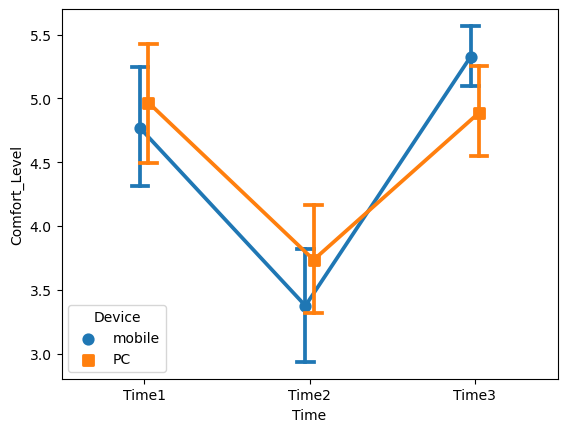

In [ ]:
sns.pointplot(data=df, x= wx , y= y , hue=bx , dodge=True, markers=['o', 's'],
              capsize=.1, )

# Question 1

### Normality Assumption

In [ ]:
df.shape

(150, 7)

In [ ]:
df['residuals'] = df[y] -  df.groupby(x)[y].transform('mean')

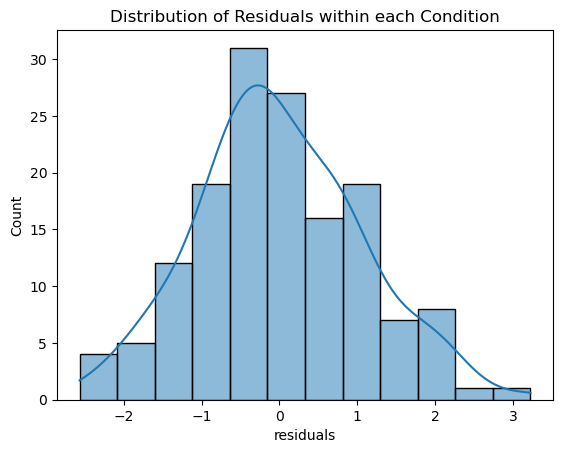

In [ ]:
sns.histplot(data =df, x = 'residuals' ,kde = True
#              ,  binwidth=1  ,binrange=[-7.5,8.5]
            )
# plt.xticks(range(-7,8,1))
# plt.yticks(range(0,21,2))
plt.title('Distribution of Residuals within each Condition')
plt.show()

In [ ]:
df.groupby(x)[y].apply(sp.stats.skewtest)

Device  Time 
PC      Time1         (0.418303638172448, 0.675725129976638)
        Time2      (0.7160968132118036, 0.47393157140688424)
        Time3       (0.6464627466616301, 0.5179797156713299)
mobile  Time1    (-0.028594529516455497, 0.9771879751154877)
        Time2       (1.266139346781626, 0.20546319786582468)
        Time3       (0.1548286758679259, 0.8769563837301206)
Name: Comfort_Level, dtype: object

In [ ]:
# a = 10
# r = [x/a for x in range(6*a,7*a)]
# plt.figure(figsize=(20,20))
# g = sns.FacetGrid(df, col = x[0],row=x[1],height=4)
# g.map(sns.histplot, y,kde = True
# #       ,binwidth=1,binrange=(1,10)
#      )

# plt.xticks(r)
# plt.show()

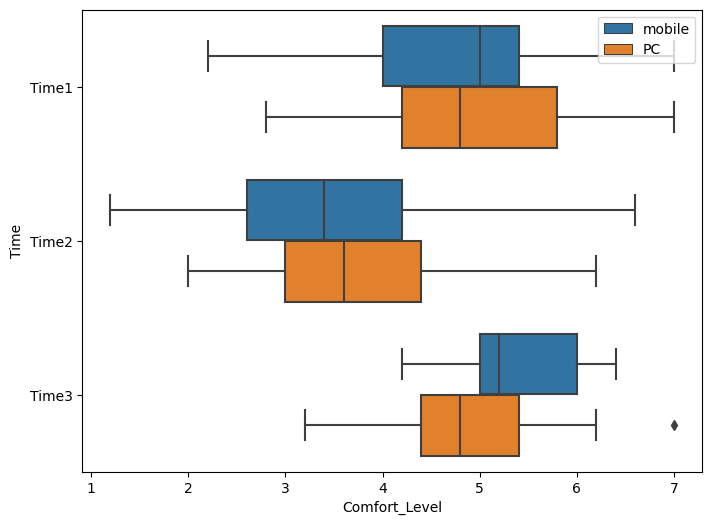

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = y , y = x[1], hue=x[0])
# plt.xticks(range(0,10,1))
plt.legend(loc=1)
plt.show()

Text(0.5, 1.0, 'Q-Q Plot of Residuals within each Condition')

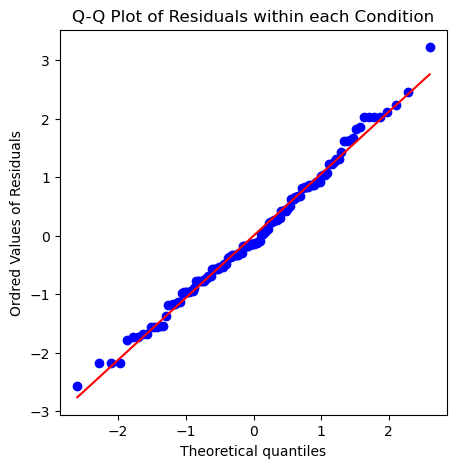

In [ ]:

fig, (ax) = plt.subplots(figsize = (5,5))
res = stats.probplot(df['residuals'],dist='norm', plot=ax)
plt.ylabel('Ordred Values of Residuals')
plt.title('Q-Q Plot of Residuals within each Condition')

In [ ]:
tmp = df.groupby(x)[y].apply(stats.describe)
tmp.iloc[0] , tmp.iloc[1] , tmp.iloc[2] , tmp.iloc[3] 

(DescribeResult(nobs=25, minmax=(2.8, 7.0), mean=4.968, variance=1.4489333333333334, skewness=0.1719258595566505, kurtosis=-0.6999948277477852),
 DescribeResult(nobs=25, minmax=(2.0, 6.2), mean=3.736, variance=1.2290666666666665, skewness=0.2963080521675574, kurtosis=-0.37440947863898355),
 DescribeResult(nobs=25, minmax=(3.2, 7.0), mean=4.888, variance=0.8236000000000001, skewness=0.2669901754550127, kurtosis=-0.07531153774090171),
 DescribeResult(nobs=25, minmax=(2.2, 7.0), mean=4.768, variance=1.5189333333333332, skewness=-0.011711780912837469, kurtosis=-0.6327676617757585))

In [ ]:
statistics = df.groupby(x)[y].apply(stats.describe).apply(pd.Series)
statistics.columns = ['nobs' , 'minmax','mean','variance','skewness','kurtosis']
statistics

statistics.reset_index(inplace=True)

s_all = pd.DataFrame(stats.describe(df[y]),index=['nobs' , 'minmax','mean','variance','skewness','kurtosis']).transpose()

s_all[[bx,wx]] = ['all','all']

s_all

statistics = s_all.append(statistics,ignore_index=True)

statistics = pd.concat([statistics.minmax.apply(pd.Series).rename(columns={0:'min',1:'max'})
                        ,statistics]
                       ,axis=1)

statistics = statistics[[bx,wx,'nobs' , 'min','max','mean','variance','skewness','kurtosis']]

statistics = statistics.set_index([bx,wx])

statistics.style.background_gradient(subset = statistics.columns[1:-3],vmin=1, vmax = 7)\
.background_gradient(subset = statistics.columns[-3:-2],vmin=0.0, vmax = 1.7,cmap='YlOrRd')\
.bar(subset = statistics.columns[-2:], align = "mid", color = ["salmon", "lightgreen"],vmin=-1,vmax=1).set_precision(3).\
set_properties(**{'text-align': 'center'}).\
set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\2357266519.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics = s_all.append(statistics,ignore_index=True)
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\2357266519.py:23: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  statistics.style.background_gradient(subset = statistics.columns[1:-3],vmin=1, vmax = 7)\


In [ ]:
statistics = df.groupby(bx)[y].apply(stats.describe).apply(pd.Series)
statistics.columns = ['nobs' , 'minmax','mean','variance','skewness','kurtosis']
statistics

statistics.reset_index(inplace=True)

s_all = pd.DataFrame(stats.describe(df[y]),index=['nobs' , 'minmax','mean','variance','skewness','kurtosis']).transpose()

s_all[[bx,wx]] = ['all','all']

s_all

statistics = s_all.append(statistics,ignore_index=True)

statistics = pd.concat([statistics.minmax.apply(pd.Series).rename(columns={0:'min',1:'max'})
                        ,statistics]
                       ,axis=1)

statistics = statistics[[bx,wx,'nobs' , 'min','max','mean','variance','skewness','kurtosis']]

statistics = statistics.set_index([bx,wx])

statistics.style.background_gradient(subset = statistics.columns[1:-3],vmin=1, vmax = 7)\
.background_gradient(subset = statistics.columns[-3:-2],vmin=0.0, vmax = 1.7,cmap='YlOrRd')\
.bar(subset = statistics.columns[-2:], align = "mid", color = ["salmon", "lightgreen"],vmin=-1,vmax=1).set_precision(3).\
set_properties(**{'text-align': 'center'}).\
set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])


C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\3743717158.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics = s_all.append(statistics,ignore_index=True)
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\3743717158.py:23: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  statistics.style.background_gradient(subset = statistics.columns[1:-3],vmin=1, vmax = 7)\


,,nobs,min,max,mean,variance,skewness,kurtosis
Device,Time,,,,,,,
all,all,150,1.200,7.000,4.511,1.608,-0.177,-0.403
PC,nan,75,2.000,7.000,4.531,1.457,0.065,-0.320
mobile,nan,75,1.200,7.000,4.491,1.781,-0.347,-0.526


In [ ]:
tmp = df.groupby(['Subj_ID','Time']).Comfort_Level.mean().unstack().reset_index().\
groupby('Subj_ID').apply(lambda x : [ float(x.Time2 - x.Time1) , float(x.Time3 - x.Time2)]).apply(pd.Series)

In [ ]:
tmp.columns = ['Time_diff_1','Time_diff_2']

In [ ]:
# statistics = tmp.melt().groupby('variable')['value'].apply(stats.describe).apply(pd.Series)
# statistics.columns = ['nobs' , 'minmax','mean','variance','skewness','kurtosis']
# statistics

# statistics.reset_index(inplace=True)

# s_all = pd.DataFrame(stats.describe(df[y]),index=['nobs' , 'minmax','mean','variance','skewness','kurtosis']).transpose()

# s_all[[bx,wx]] = ['all','all']

# s_all

# statistics = s_all.append(statistics,ignore_index=True)

# statistics = pd.concat([statistics.minmax.apply(pd.Series).rename(columns={0:'min',1:'max'})
#                         ,statistics]
#                        ,axis=1)

# statistics = statistics[[bx,wx,'nobs' , 'min','max','mean','variance','skewness','kurtosis']]

# statistics = statistics.set_index([bx,wx])

# statistics.style.background_gradient(subset = statistics.columns[1:-3],vmin=1, vmax = 7)\
# .background_gradient(subset = statistics.columns[-3:-2],vmin=0.0, vmax = 1.7,cmap='YlOrRd')\
# .bar(subset = statistics.columns[-2:], align = "mid", color = ["salmon", "lightgreen"],vmin=-1,vmax=1).set_precision(3).\
# set_properties(**{'text-align': 'center'}).\
# set_table_styles(
# [dict(selector = 'th', props=[('text-align', 'center')])])


In [ ]:
stats.normaltest(df.residuals)

NormaltestResult(statistic=1.7682690556650142, pvalue=0.4130715205238942)

In [ ]:
df.groupby(x)[y].apply(stats.normaltest)

Device  Time 
PC      Time1    (0.5391593742767964, 0.7637004199964726)
        Time2     (0.5128731617848263, 0.773804066966766)
        Time3    (0.6239299910059412, 0.7320071513220022)
mobile  Time1    (0.21530261346753388, 0.897940647705159)
        Time2    (2.5865456249556122, 0.2743713460832546)
        Time3     (1.507369740230341, 0.4706291463717309)
Name: Comfort_Level, dtype: object

In [ ]:
stats.shapiro(df.residuals,)

ShapiroResult(statistic=0.9912624955177307, pvalue=0.4850658178329468)

In [ ]:
df.groupby(x)[y].apply(stats.shapiro)

Device  Time 
PC      Time1    (0.9479243159294128, 0.22501717507839203)
        Time2     (0.9671670198440552, 0.5743958950042725)
        Time3      (0.9692597985267639, 0.626355767250061)
mobile  Time1     (0.9797786474227905, 0.8806836605072021)
        Time2     (0.9761766791343689, 0.8004722595214844)
        Time3    (0.9437336325645447, 0.18046875298023224)
Name: Comfort_Level, dtype: object

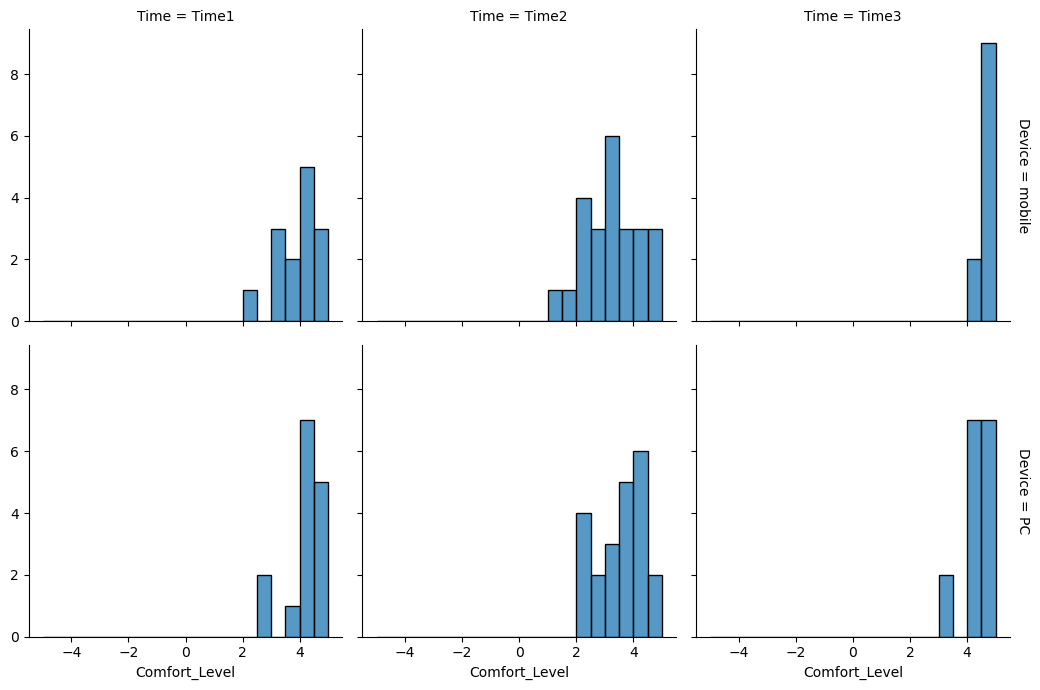

In [ ]:

g = sns.FacetGrid(df, col=wx, row = bx,height=3.5,margin_titles=True)

g.map(sns.histplot, y,binwidth = 0.5, binrange = ( -5 ,5 ))




In [ ]:
df['z_score'] = df.groupby(x)[y].transform(stats.zscore , ddof=1)

Text(0.5, 0.98, 'Z-score within each Condition')

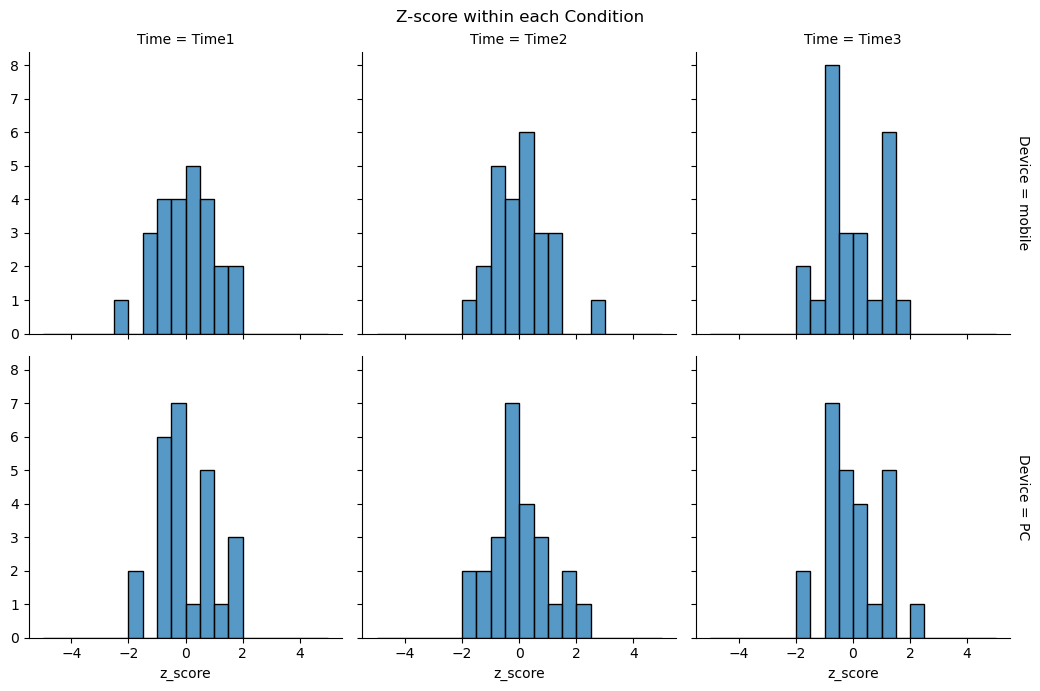

In [ ]:

g = sns.FacetGrid(df, col=wx, row = bx,height=3.5,margin_titles=True)

g.map(sns.histplot, 'z_score',binwidth = 0.5, binrange = ( -5 ,5 ))
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Z-score within each Condition')




In [ ]:
df['outlier'] = df.z_score.abs()> 2

In [ ]:
def color_boolean(val):
    color =''
    if val == True:
        color = 'red'
    elif val == False:
        color = 'green'
    return 'background-color: %s' % color

In [ ]:
df.style.applymap(color_boolean, subset=['outlier']).\
bar(subset = ["z_score"], align = "mid", color = ["salmon", "lightgreen"])


,Device,Subj_ID,Time,Comfort_Level,residuals,z_score,outlier
0,mobile,53,Time1,3.200000,-1.568000,-1.272262,False
1,mobile,54,Time1,5.000000,0.232000,0.188243,False
2,mobile,55,Time1,5.000000,0.232000,0.188243,False
3,mobile,57,Time1,4.000000,-0.768000,-0.623149,False
4,mobile,58,Time1,3.200000,-1.568000,-1.272262,False
5,mobile,64,Time1,3.200000,-1.568000,-1.272262,False
6,mobile,69,Time1,4.000000,-0.768000,-0.623149,False
7,mobile,85,Time1,5.200000,0.432000,0.350521,False
8,mobile,201,Time1,5.200000,0.432000,0.350521,False
9,mobile,204,Time1,6.200000,1.432000,1.161913,False


# Question 3

In [ ]:
df.groupby(x)[y].apply(sp.stats.skewtest)

Device  Time 
PC      Time1         (0.418303638172448, 0.675725129976638)
        Time2      (0.7160968132118036, 0.47393157140688424)
        Time3       (0.6464627466616301, 0.5179797156713299)
mobile  Time1    (-0.028594529516455497, 0.9771879751154877)
        Time2       (1.266139346781626, 0.20546319786582468)
        Time3       (0.1548286758679259, 0.8769563837301206)
Name: Comfort_Level, dtype: object

###  Levene's test for homogeneity of variances

In [ ]:
groups = df.groupby(bx)[y].apply(lambda t : t.to_list())

In [ ]:
groups

Device
PC        [4.4, 4.8, 4.2, 4.0, 4.0, 5.2, 6.6, 2.8, 4.8, ...
mobile    [3.2, 5.0, 5.0, 4.0, 3.2, 3.2, 4.0, 5.2, 5.2, ...
Name: Comfort_Level, dtype: object

In [ ]:
stats.levene(*groups,center = 'mean')

LeveneResult(statistic=1.5898554314594266, pvalue=0.20933085311613298)

###  Mauchly sphericity test 


In [ ]:
pg.sphericity(df, dv = y ,within = wx,subject = 'Subj_ID')

SpherResults(spher=True, W=0.9650370644812488, chi2=1.7082609404107627, dof=2, pval=0.42565314830917644)

In [ ]:
df.groupby(wx)[y].var()

Time
Time1    1.463853
Time2    1.353943
Time3    0.648506
Name: Comfort_Level, dtype: float64

###  Box’s M for homogeneity of covariances


In [ ]:
print(pg.box_m(df, dvs = [y] ,group= bx))

         Chi2   df      pval  equal_cov
box  0.740294  1.0  0.389567       True


### mixed Anova

In [ ]:
mixed = pg.mixed_anova(df, dv = y, between = bx,within = wx,subject = 'Subj_ID').fillna("")
mixed = mixed.drop(columns=['eps','np2'])

mixed.style.highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\
highlight_between(subset='p-unc',color='orange', left= 0.01 , right= 0.05).\
highlight_between(subset='p-unc',color='yellow', left= 0.05 , right= 0.1).set_precision(3)


C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\2388676369.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  mixed.style.highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\


,Source,SS,DF1,DF2,MS,F,p-unc
0,Device,0.060,1,48,0.060,0.025,0.874
1,Time,69.794,2,96,34.897,64.800,0.000
2,Interaction,4.480,2,96,2.240,4.159,0.019


In [ ]:
pairwise_ttests = pg.pairwise_ttests(dv=y, within=wx, between=bx,
                              subject='Subj_ID', data=df)
pairwise_ttests = pairwise_ttests.drop(columns=['BF10','hedges','alternative'])
pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\
highlight_max(subset=['Parametric'],color='skyblue').\
highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\
highlight_between(subset='p-unc',color='orange', left= 0.01 , right= 0.05).\
highlight_between(subset='p-unc',color='yellow', left= 0.05 , right= 0.1).set_precision(3)


C:\Users\Rasstin\anaconda3\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\4014954842.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\


,Contrast,Time,A,B,Paired,Parametric,T,dof,p-unc
0,Time,-,Time1,Time2,True,True,9.198,49.000,0.000
1,Time,-,Time1,Time3,True,True,-1.646,49.000,0.106
2,Time,-,Time2,Time3,True,True,-9.413,49.000,0.000
3,Device,-,PC,mobile,False,True,0.159,48.000,0.874
4,Time * Device,Time1,PC,mobile,False,True,0.580,48.000,0.564
5,Time * Device,Time2,PC,mobile,False,True,1.096,48.000,0.279
6,Time * Device,Time3,PC,mobile,False,True,-1.989,48.000,0.052


In [ ]:
df.shape

(150, 7)

In [ ]:
mixed = pg.mixed_anova(df[df.Time != 'Time3'], dv = y, between = bx,within = wx,subject = 'Subj_ID').fillna("")
mixed = mixed.drop(columns=['eps','np2'])
mixed.style.highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\
highlight_between(subset='p-unc',color='orange', left= 0.01 , right= 0.05).\
highlight_between(subset='p-unc',color='yellow', left= 0.05 , right= 0.1).set_precision(3)


C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\3567437445.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  mixed.style.highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\


,Source,SS,DF1,DF2,MS,F,p-unc
0,Device,1.960,1,48,1.960,0.846,0.362
1,Time,43.034,1,48,43.034,83.404,0.000
2,Interaction,0.160,1,48,0.160,0.310,0.580


In [ ]:
pairwise_ttests = pg.pairwise_ttests(dv=y, within=wx, between=bx,
                              subject='Subj_ID', data=df[df.Time != 'Time3'])
pairwise_ttests = pairwise_ttests.drop(columns=['BF10','hedges','alternative'])
pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\
highlight_max(subset=['Parametric'],color='skyblue').\
highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\
highlight_between(subset='p-unc',color='orange', left= 0.01 , right= 0.05).\
highlight_between(subset='p-unc',color='yellow', left= 0.05 , right= 0.1).set_precision(3)


C:\Users\Rasstin\anaconda3\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\3065625945.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\


,Contrast,Time,A,B,Paired,Parametric,T,dof,p-unc
0,Time,-,Time1,Time2,True,True,9.198,49.000,0.000
1,Device,-,PC,mobile,False,True,0.920,48.000,0.362
2,Time * Device,Time1,PC,mobile,False,True,0.580,48.000,0.564
3,Time * Device,Time2,PC,mobile,False,True,1.096,48.000,0.279


<AxesSubplot:xlabel='Time', ylabel='Comfort_Level'>

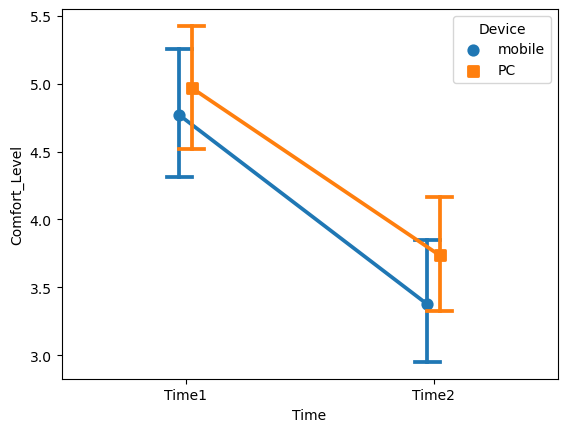

In [ ]:
sns.pointplot(data=df[df.Time != 'Time3'], x= wx , y= y , hue=bx , dodge=True, markers=['o', 's'],
              capsize=.1, )

In [ ]:
mixed = pg.mixed_anova(df[df.Time != 'Time1'], dv = y, between = bx,within = wx,subject = 'Subj_ID').fillna("")
mixed = mixed.drop(columns=['eps','np2'])

mixed.style.highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\
highlight_between(subset='p-unc',color='orange', left= 0.01 , right= 0.05).\
highlight_between(subset='p-unc',color='yellow', left= 0.05 , right= 0.1).set_precision(3)


C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\1267528800.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  mixed.style.highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\


,Source,SS,DF1,DF2,MS,F,p-unc
0,Device,0.040,1,48,0.040,0.030,0.864
1,Time,60.218,1,48,60.218,98.642,0.000
2,Interaction,4.000,1,48,4.000,6.552,0.014


In [ ]:
pairwise_ttests = pg.pairwise_ttests(dv=y, within=wx, between=bx,
                              subject='Subj_ID', data=df[df.Time != 'Time1'])
pairwise_ttests = pairwise_ttests.drop(columns=['BF10','hedges','alternative'])
pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\
highlight_max(subset=['Parametric'],color='skyblue').\
highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\
highlight_between(subset='p-unc',color='orange', left= 0.01 , right= 0.05).\
highlight_between(subset='p-unc',color='yellow', left= 0.05 , right= 0.1).set_precision(3)


C:\Users\Rasstin\anaconda3\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\737171952.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\


,Contrast,Time,A,B,Paired,Parametric,T,dof,p-unc
0,Time,-,Time2,Time3,True,True,-9.413,49.000,0.000
1,Device,-,PC,mobile,False,True,-0.172,48.000,0.864
2,Time * Device,Time2,PC,mobile,False,True,1.096,48.000,0.279
3,Time * Device,Time3,PC,mobile,False,True,-1.989,48.000,0.052


<AxesSubplot:xlabel='Time', ylabel='Comfort_Level'>

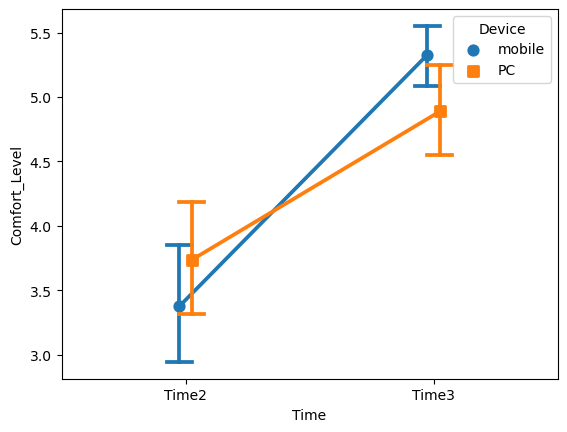

In [ ]:
sns.pointplot(data=df[df.Time != 'Time1'], x= wx , y= y , hue=bx , dodge=True, markers=['o', 's'],
              capsize=.1, )

In [ ]:
!jupyter nbconvert --to webpdf --allow-chromium-download MostafaSayyahi_A8_Code.ipynb

[NbConvertApp] Converting notebook MostafaSayyahi_A8_Code.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 815197 bytes to MostafaSayyahi_A8_Code.pdf


In [ ]:
pairwise_ttests = pg.pairwise_ttests(dv=y, between=bx,
                              subject='Subj_ID', data=df,padjust='holm')

pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\
highlight_max(subset=['Parametric'],color='skyblue').\
highlight_between(subset='p-unc',color='orange', left= 0 , right= 0.05)


C:\Users\Rasstin\anaconda3\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Device,PC,mobile,False,True,0.192521,148.000000,two-sided,0.847598,0.179,0.031279


,Device,Subj_ID,Time,Comfort_Level,residuals,z_score,outlier
0,mobile,53,Time1,3.2,-1.568,-1.272262,False
1,mobile,54,Time1,5.0,0.232,0.188243,False
2,mobile,55,Time1,5.0,0.232,0.188243,False
3,mobile,57,Time1,4.0,-0.768,-0.623149,False
4,mobile,58,Time1,3.2,-1.568,-1.272262,False
...,...,...,...,...,...,...,...
145,PC,303,Time3,4.6,-0.288,-0.317347,False
146,PC,305,Time3,5.0,0.112,0.123413,False
147,PC,306,Time3,4.8,-0.088,-0.096967,False
148,PC,307,Time3,4.2,-0.688,-0.758107,False


In [ ]:
tmp = df.groupby(['Subj_ID','Device','Time']).Comfort_Level.mean().unstack().reset_index().\
groupby(['Subj_ID','Device']).apply(lambda x : [ float(x.Time2 - x.Time1) , float(x.Time3 - x.Time2)]).apply(pd.Series)

tmp.columns = ['Time_diff_1_2','Time_diff_2_3']
tmp.reset_index(inplace=True)

In [ ]:
pairwise_ttests = pg.pairwise_ttests(dv='Time_diff_2_3', between=bx,
                              subject='Subj_ID', data=tmp)
pairwise_ttests = pairwise_ttests.drop(columns=['BF10','hedges','alternative'])
pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\
highlight_max(subset=['Parametric'],color='skyblue').\
highlight_between(subset='p-unc',color='red', left= 0.0 , right= 0.01).\
highlight_between(subset='p-unc',color='orange', left= 0.01 , right= 0.05).\
highlight_between(subset='p-unc',color='yellow', left= 0.05 , right= 0.1).set_precision(3)


C:\Users\Rasstin\anaconda3\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
C:\Users\Rasstin\AppData\Local\Temp\ipykernel_26400\941154167.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pairwise_ttests.style.highlight_max(subset=['Paired'],color='cornflowerblue').\


,Contrast,A,B,Paired,Parametric,T,dof,p-unc
0,Device,PC,mobile,False,True,-2.560,48.000,0.014
